In [86]:
import pandas as pd
import os
import matplotlib.cm as cm #allows us easy access to colormaps
import matplotlib.pyplot as plt #sets up plotting under plt
import seaborn as sns
sns.set_style('whitegrid')

HOUSING_PATH = 'house-prices-advanced-regression-techniques/'
def load_housing_data(housing_path, fileName): 
    csv_path = os.path.join(housing_path, fileName) 
    try:
        return pd.read_csv(csv_path)
    except:
        print("Given File not available..Please check you entered the correct fine name...!")

In [77]:
HousingTrainData = load_housing_data(HOUSING_PATH, 'train.csv')
HousingTrainData.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [76]:
HousingTrainData.shape

(1460, 81)

In [52]:
HousingTrainData.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64


In [51]:
HousingTrainData.dtypes.value_counts()

object     43
int64      35
float64     3
dtype: int64

In [36]:
HousingTrainData.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [37]:
HousingTrainData['SaleCondition'].value_counts()

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

In [39]:
HousingTrainData.isna().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

In [42]:
HousingTrainData['PoolQC'].value_counts()

Gd    3
Fa    2
Ex    2
Name: PoolQC, dtype: int64

In [43]:
HousingTrainData['GarageType'].value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

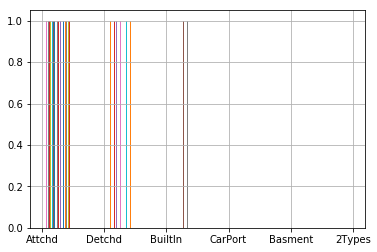

In [44]:
HousingTrainData['GarageType'].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x132d2e828>,
      dtype=object)

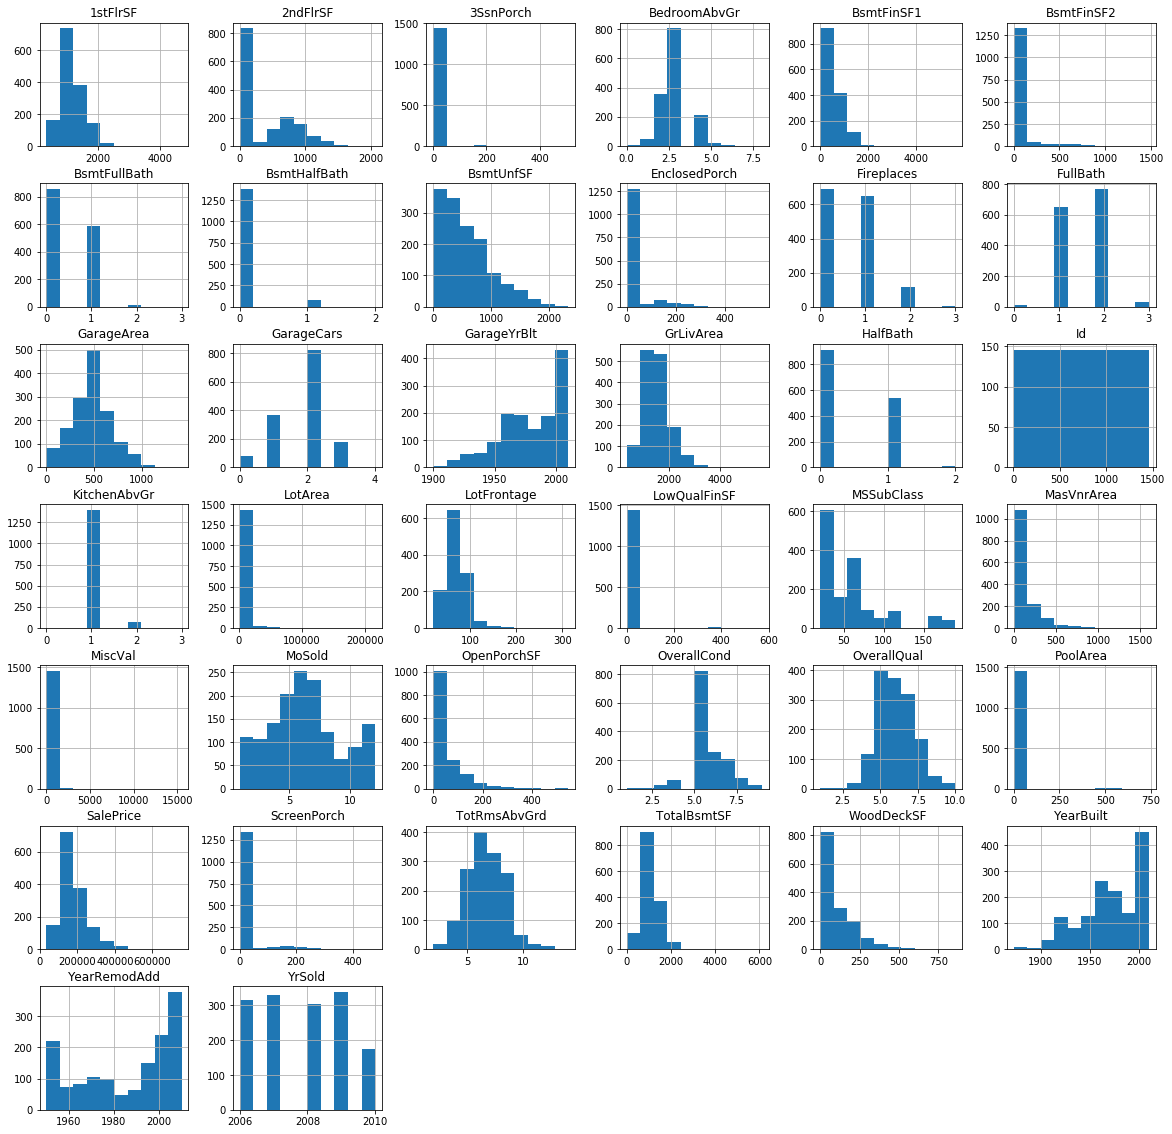

In [48]:
HousingTrainData.hist(figsize=(20,20))

In [54]:
HousingTrainData['MSSubClass'].value_counts()

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

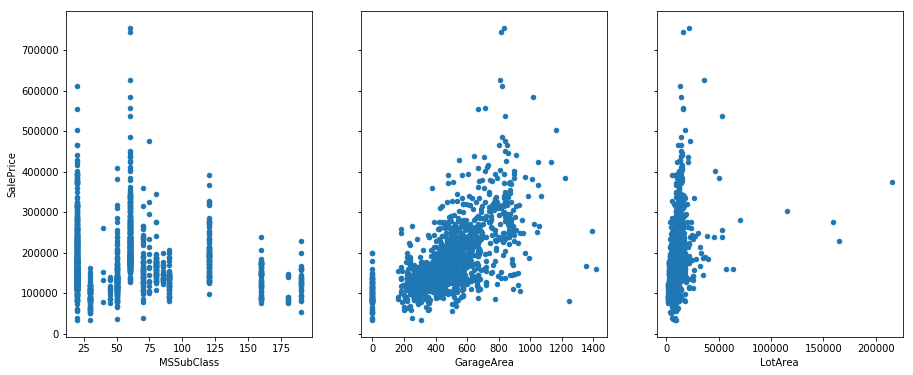

In [85]:
fig, axs = plt.subplots(1, 3, sharey=True, figsize=(15, 6))
HousingTrainData.plot(kind='scatter', x='MSSubClass', y='SalePrice', ax=axs[0])
HousingTrainData.plot(kind='scatter', x='GarageArea', y='SalePrice', ax=axs[1])
HousingTrainData.plot(kind='scatter', x='LotArea', y='SalePrice', ax=axs[2])

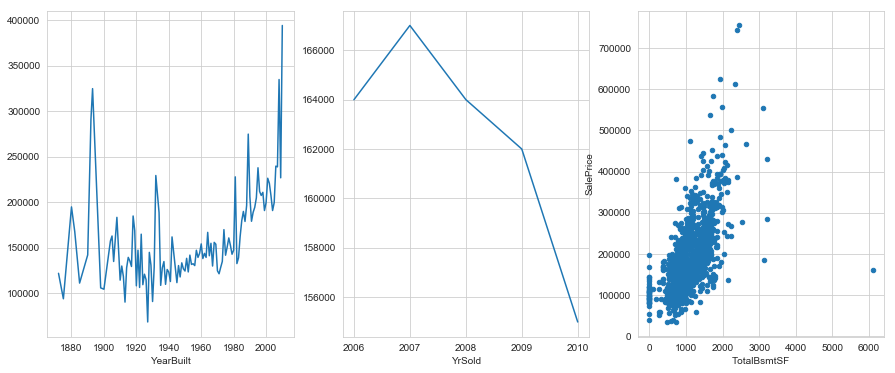

In [120]:
fig, axs = plt.subplots(1, 3, figsize=(15, 6))
# HousingTrainData.plot(kind='scatter', x='YearBuilt', y='SalePrice', ax=axs[0])
HousingTrainData.groupby(by=[HousingTrainData.YearBuilt])['SalePrice'].median().plot(kind='line', x='YearBuilt', y='SalePrice', ax=axs[0])
HousingTrainData.groupby(by=HousingTrainData.YrSold)['SalePrice'].median().plot(ax=axs[1])
HousingTrainData.plot(kind='scatter', x='TotalBsmtSF', y='SalePrice', ax=axs[2])

In [106]:
year_column = []
for column in HousingTrainData.columns:
    if 'Year' in column or 'Yr' in column:
#         print(column)
        year_column.append(column)

In [107]:
year_column

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [112]:
HousingTrainData[year_column].head()

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,2003,2003,2003.0,2008
1,1976,1976,1976.0,2007
2,2001,2002,2001.0,2008
3,1915,1970,1998.0,2006
4,2000,2000,2000.0,2008


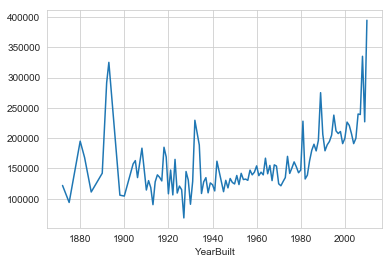

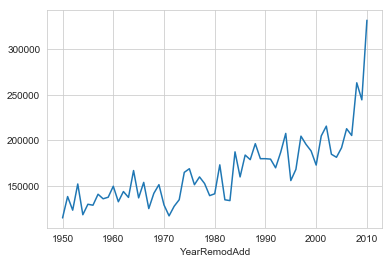

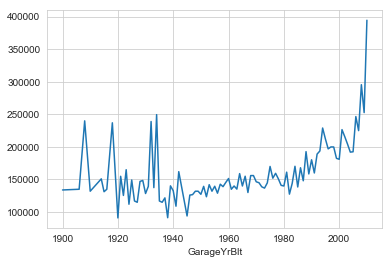

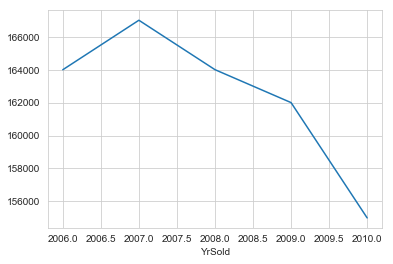

In [114]:
for column in year_column:
    HousingTrainData.groupby(by=[column])['SalePrice'].median().plot()
    plt.show()

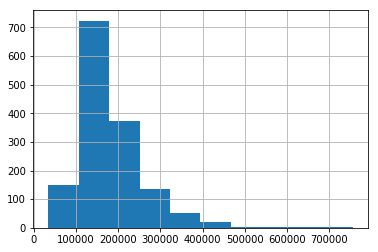

In [68]:

HousingTrainData['SalePrice'].hist()

In [ ]:
HousingTrainData['KitchenQual']

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


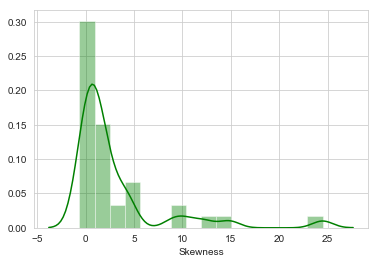

In [87]:
sns.distplot(HousingTrainData.skew(),color='green',axlabel ='Skewness')
plt.show()

In [90]:
len(HousingTrainData['SalePrice'].value_counts())

663